In [375]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager as fm
import warnings

In [531]:
font_path = 'data/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['figure.figsize'] = (8, 4)

# 한글 텍스트 렌더링 테스트
# plt.text(0.5, 0.5, '폰트 테스트 - 한글 출력 확인', size=20, ha='center')
# plt.title('폰트 설정 테스트')
# plt.show()

In [2]:
file_path = 'data/bc_card.txt'
with open(file_path, 'rb') as f:
    with open('data/dc_card_output.txt', 'w') as w:
        data = f.read()
        print(type(data))
        data = data.decode('cp949')
        print(type(data))
        w.write(data)

<class 'bytes'>
<class 'str'>


In [3]:
with open('data/bc_card_output.txt', 'r') as f:
    data = f.read()
    print(len(data))

10235713


In [4]:
data[:600]

'REG_YYMM\tMEGA_CTY_NO\tMEGA_CTY_NM\tCTY_RGN_NO\tCTY_RGN_NM\tADMI_CTY_NO\tADMI_CTY_NM\tMAIN_BUZ_CODE\tMAIN_BUZ_DESC\tTP_GRP_NO\tTP_GRP_NM\tTP_BUZ_NO\tTP_BUZ_NM\tCSTMR_GUBUN\tCSTMR_MEGA_CTY_NO\tCSTMR_MEGA_CTY_NM\tCSTMR_CTY_RGN_NO\tCSTMR_CTY_RGN_NM\tSEX_CTGO_CD\tAGE_VAL\tFLC\tAMT\tCNT201906\t11\t서울특별시\t1162\t관악구\t11620585\t낙성대동\t80\t음식\t80\t일반음식\t8006\t서양음식\t내국인\t11\t서울특별시\t1162\t관악구\t2\t30대\t2\t26284804\t1892201906\t11\t서울특별시\t1159\t동작구\t11590560\t상도4동\t30\t생활\t40\t유통업영리\t4010\t편 의 점\t내국인\t11\t서울특별시\t1165\t서초구\t2\t20대\t1\t109290\t18201906\t11\t서울특별시\t1162\t관악구\t11620595\t청룡동\t30\t생활\t83\t음식료품\t8399\t기타음료식품\t내국인\t11\t서울특별시\t1162\t관악구\t1\t20대\t1\t268850\t52201906\t11\t서울특별시\t1144\t마포구\t11'

\tCNT201906
마지막 컬럼 CNT뒤에 날짜데이터가 붙어있음.

In [6]:
data_split = data.split('\t')
print(data_split[:23])
print(len(data_split[:23]))

['REG_YYMM', 'MEGA_CTY_NO', 'MEGA_CTY_NM', 'CTY_RGN_NO', 'CTY_RGN_NM', 'ADMI_CTY_NO', 'ADMI_CTY_NM', 'MAIN_BUZ_CODE', 'MAIN_BUZ_DESC', 'TP_GRP_NO', 'TP_GRP_NM', 'TP_BUZ_NO', 'TP_BUZ_NM', 'CSTMR_GUBUN', 'CSTMR_MEGA_CTY_NO', 'CSTMR_MEGA_CTY_NM', 'CSTMR_CTY_RGN_NO', 'CSTMR_CTY_RGN_NM', 'SEX_CTGO_CD', 'AGE_VAL', 'FLC', 'AMT', 'CNT201906']
23


In [7]:
data_split[22]

'CNT201906'

In [8]:
data_split[22][:3] + '\t' + data_split[22][3:]

'CNT\t201906'

In [9]:
data.find('CNT') #  260에 \t 추가 

257

In [10]:
data = data[:260] + '\t' + data[260:]
data[:300]
data_split = data.split('\t')
print(data_split[:100])

['REG_YYMM', 'MEGA_CTY_NO', 'MEGA_CTY_NM', 'CTY_RGN_NO', 'CTY_RGN_NM', 'ADMI_CTY_NO', 'ADMI_CTY_NM', 'MAIN_BUZ_CODE', 'MAIN_BUZ_DESC', 'TP_GRP_NO', 'TP_GRP_NM', 'TP_BUZ_NO', 'TP_BUZ_NM', 'CSTMR_GUBUN', 'CSTMR_MEGA_CTY_NO', 'CSTMR_MEGA_CTY_NM', 'CSTMR_CTY_RGN_NO', 'CSTMR_CTY_RGN_NM', 'SEX_CTGO_CD', 'AGE_VAL', 'FLC', 'AMT', 'CNT', '201906', '11', '서울특별시', '1162', '관악구', '11620585', '낙성대동', '80', '음식', '80', '일반음식', '8006', '서양음식', '내국인', '11', '서울특별시', '1162', '관악구', '2', '30대', '2', '26284804', '1892201906', '11', '서울특별시', '1159', '동작구', '11590560', '상도4동', '30', '생활', '40', '유통업영리', '4010', '편 의 점', '내국인', '11', '서울특별시', '1165', '서초구', '2', '20대', '1', '109290', '18201906', '11', '서울특별시', '1162', '관악구', '11620595', '청룡동', '30', '생활', '83', '음식료품', '8399', '기타음료식품', '내국인', '11', '서울특별시', '1162', '관악구', '1', '20대', '1', '268850', '52201906', '11', '서울특별시', '1144', '마포구', '11440660', '서교동', '80', '음식', '80', '일반음식']


In [11]:
cols = 23
total_data = len(data_split)

In [12]:
print(total_data / cols)
print(total_data % cols)

95654.17391304347
4


전체 데이터 개수를 컬럼수로 나누었을때 딱 떨어지지 않아서 어딘가 문제가 있을 가능성.


In [14]:
data_split[22], data_split[23] 

('CNT', '201906')

In [15]:
data_split[23+22], data_split[23+22+22], data_split[23+22+22+22] , data_split[23+22+22+22+22] 

('1892201906', '18201906', '52201906', '1790201906')

In [16]:
data_split[23+22].find('201906')

4

In [17]:
data_split[23+22][4:]

'201906'

In [18]:
cycle = 22
i = 1
while i < round((len(data_split) - cycle) / cycle):
    IDX = cols+(cycle*i)
    target_index = data_split[IDX].find('201906')
    i += 1
    data_split[IDX] = data_split[IDX][:target_index] + '\t' + data_split[IDX][target_index:]


In [19]:
data_split[23+22], data_split[23+22+22], data_split[23+22+22+22] , data_split[23+22+22+22+22] 

('1892\t201906', '18\t201906', '52\t201906', '1790\t201906')

In [20]:
data_join = "\t".join(data_split)

In [22]:
data_split = data_join.split('\t')

In [26]:
data_split[23+22], data_split[23+22+22], data_split[23+22+22+22] , data_split[23+22+22+22+22] 

('1892', '109290', '1', '20대')

In [30]:
print(len(data_split) / cols)
print(len(data_split) % cols)

100002.0
0


In [42]:
total = [data_split[i:cols+i] for i in range(0, len(data_split), cols)]

print(total[0])
print(total[1])

['REG_YYMM', 'MEGA_CTY_NO', 'MEGA_CTY_NM', 'CTY_RGN_NO', 'CTY_RGN_NM', 'ADMI_CTY_NO', 'ADMI_CTY_NM', 'MAIN_BUZ_CODE', 'MAIN_BUZ_DESC', 'TP_GRP_NO', 'TP_GRP_NM', 'TP_BUZ_NO', 'TP_BUZ_NM', 'CSTMR_GUBUN', 'CSTMR_MEGA_CTY_NO', 'CSTMR_MEGA_CTY_NM', 'CSTMR_CTY_RGN_NO', 'CSTMR_CTY_RGN_NM', 'SEX_CTGO_CD', 'AGE_VAL', 'FLC', 'AMT', 'CNT']
['201906', '11', '서울특별시', '1162', '관악구', '11620585', '낙성대동', '80', '음식', '80', '일반음식', '8006', '서양음식', '내국인', '11', '서울특별시', '1162', '관악구', '2', '30대', '2', '26284804', '1892']


In [44]:
df = pd.DataFrame(total[1:], columns=total[0])
df.head()

,REG_YYMM,MEGA_CTY_NO,MEGA_CTY_NM,CTY_RGN_NO,CTY_RGN_NM,ADMI_CTY_NO,ADMI_CTY_NM,MAIN_BUZ_CODE,MAIN_BUZ_DESC,TP_GRP_NO,...,CSTMR_GUBUN,CSTMR_MEGA_CTY_NO,CSTMR_MEGA_CTY_NM,CSTMR_CTY_RGN_NO,CSTMR_CTY_RGN_NM,SEX_CTGO_CD,AGE_VAL,FLC,AMT,CNT
0,201906,11,서울특별시,1162,관악구,11620585,낙성대동,80,음식,80,...,내국인,11,서울특별시,1162,관악구,2,30대,2,26284804,1892
1,201906,11,서울특별시,1159,동작구,11590560,상도4동,30,생활,40,...,내국인,11,서울특별시,1165,서초구,2,20대,1,109290,18
2,201906,11,서울특별시,1162,관악구,11620595,청룡동,30,생활,83,...,내국인,11,서울특별시,1162,관악구,1,20대,1,268850,52
3,201906,11,서울특별시,1144,마포구,11440660,서교동,80,음식,80,...,내국인,11,서울특별시,1138,은평구,1,20대,1,44174450,1790
4,201906,11,서울특별시,1120,성동구,11200550,사근동,80,음식,80,...,내국인,11,서울특별시,1120,성동구,1,20대,1,60338146,3536


In [63]:
df.to_csv('data/201906bc_card.csv', encoding='utf-8')

In [67]:
bc = pd.read_csv('data/201906bc_card.csv', encoding='utf-8', index_col=0)
bc.head()

,REG_YYMM,MEGA_CTY_NO,MEGA_CTY_NM,CTY_RGN_NO,CTY_RGN_NM,ADMI_CTY_NO,ADMI_CTY_NM,MAIN_BUZ_CODE,MAIN_BUZ_DESC,TP_GRP_NO,...,CSTMR_GUBUN,CSTMR_MEGA_CTY_NO,CSTMR_MEGA_CTY_NM,CSTMR_CTY_RGN_NO,CSTMR_CTY_RGN_NM,SEX_CTGO_CD,AGE_VAL,FLC,AMT,CNT
0,201906,11,서울특별시,1162,관악구,11620585,낙성대동,80,음식,80,...,내국인,11,서울특별시,1162,관악구,2,30대,2,26284804,1892
1,201906,11,서울특별시,1159,동작구,11590560,상도4동,30,생활,40,...,내국인,11,서울특별시,1165,서초구,2,20대,1,109290,18
2,201906,11,서울특별시,1162,관악구,11620595,청룡동,30,생활,83,...,내국인,11,서울특별시,1162,관악구,1,20대,1,268850,52
3,201906,11,서울특별시,1144,마포구,11440660,서교동,80,음식,80,...,내국인,11,서울특별시,1138,은평구,1,20대,1,44174450,1790
4,201906,11,서울특별시,1120,성동구,11200550,사근동,80,음식,80,...,내국인,11,서울특별시,1120,성동구,1,20대,1,60338146,3536


In [95]:
bc.sample(10)


,REG_YYMM,MEGA_CTY_NO,MEGA_CTY_NM,CTY_RGN_NO,CTY_RGN_NM,ADMI_CTY_NO,ADMI_CTY_NM,MAIN_BUZ_CODE,MAIN_BUZ_DESC,TP_GRP_NO,...,CSTMR_GUBUN,CSTMR_MEGA_CTY_NO,CSTMR_MEGA_CTY_NM,CSTMR_CTY_RGN_NO,CSTMR_CTY_RGN_NM,SEX_CTGO_CD,AGE_VAL,FLC,AMT,CNT
61255,201906,11,서울특별시,1147,양천구,11470510,목1동,80,음식,80,...,내국인,11,서울특별시,1171,송파구,1,30대,2,577500,13
86352,201906,11,서울특별시,1168,강남구,11680640,역삼1동,30,생활,62,...,내국인,47,경상북도,4719,구미시,2,30대,3,1323584,18
54401,201906,11,서울특별시,1168,강남구,11680545,압구정동,80,음식,80,...,내국인,11,서울특별시,1153,구로구,2,30대,2,1632470,75
40153,201906,11,서울특별시,1165,서초구,11650530,서초3동,99,기타,91,...,내국인,11,서울특별시,1117,용산구,2,50대,4,540300,21
96806,201906,11,서울특별시,1111,종로구,11110650,혜화동,85,유흥,86,...,내국인,41,경기도,4136,남양주시,2,40대,3,61900,11
10928,201906,11,서울특별시,1132,도봉구,11320660,쌍문1동,30,생활,70,...,내국인,11,서울특별시,1130,강북구,1,50대,4,194900,15
3547,201906,11,서울특별시,1168,강남구,11680630,대치4동,80,음식,80,...,내국인,28,인천광역시,2811,중구,1,30대,2,158700,24
78086,201906,11,서울특별시,1120,성동구,11200720,송정동,80,음식,80,...,내국인,11,서울특별시,1174,강동구,1,30대,2,78300,6
5609,201906,11,서울특별시,1138,은평구,11380520,불광1동,30,생활,70,...,내국인,41,경기도,4128,고양시,1,30대,2,141500,6
99671,201906,11,서울특별시,1117,용산구,11170685,한남동,80,음식,80,...,내국인,11,서울특별시,1159,동작구,2,20대,1,3209130,141


1. 총 고객수 
2. 서울시 거주/비거주 고객수
3. 남녀 고객 성별 소비액
4. 편의점 소비액 TP_BUZ_NO 4010
5. 강남구 편의점 소비금액
6. 강남구에서 타 거주자가 소비한 금액 

In [614]:
len(bc.index)

100001

In [616]:
print("1. 총 고객수 : ", '{0:,}'.format(len(bc.index)),"명")

1. 총 고객수 :  100,001 명


In [600]:
# total_members = bc.groupby('CSTMR_MEGA_CTY_NM')
# total_members = total_members.sum().sort_values(ascending=False)

In [602]:
# total_members.plot(kind='bar')
# plt.xticks(rotation=45)
# #plt.yticks([0, 1000000, 2000000, 4000000, 6000000])  # 직접 지정

# # max_y = total_members.max()
# # step = 10  # 틱 간격 
# # plt.yticks(np.arange(0, max_y + step, step))

# plt.show()

In [630]:
home = len(bc[bc['MEGA_CTY_NM'] == bc['CSTMR_MEGA_CTY_NM']])
other = len(bc[bc['MEGA_CTY_NM'] != bc['CSTMR_MEGA_CTY_NM']])
live = [home, other]
df_live = pd.DataFrame(live)
df_live.columns = ['전체 고객수']
df_live.index = ['서울시 거주', '서울시 비거주']
print("2. 서울시 거주/비거주 고객수")
df_live


2. 서울시 거주/비거주 고객수


,전체 고객수
서울시 거주,54150
서울시 비거주,45851


<Axes: ylabel='전체 고객수'>

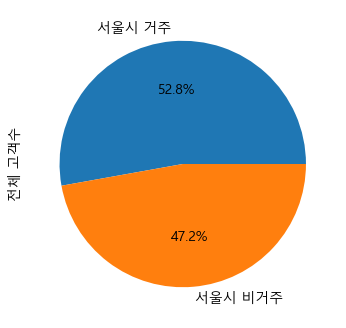

In [585]:
df_live['전체 고객수'].plot(kind='pie', autopct='%1.1f%%', figsize=(4, 4), fontsize=10 )

In [287]:
amount = bc.groupby(by='SEX_CTGO_CD')['AMT'].sum()
amount.index = ['남', '여']
formatted_amount = amount.apply(lambda x: '{0:,}'.format(x) )
print("3. 남녀 고객 성별 소비액")
print(formatted_amount,"원")

3. 남녀 고객 성별 소비액
남    131,707,949,762
여    134,542,328,736
Name: AMT, dtype: object 원


<Axes: ylabel='AMT'>

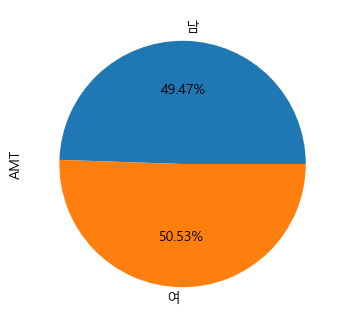

In [507]:
amount.plot(kind='pie', autopct='%1.2f%%')


In [293]:
# 편의점 소비액 TP_BUZ_NO 4010
conv = bc.loc[(bc['TP_BUZ_NO']==4010), ['TP_BUZ_NO','TP_BUZ_NM','AMT']]
conv_sum = conv['AMT'].sum()
print("4. 편의점 소비액 \n", format(conv_sum, ","),"원")

4. 편의점 소비액 
 7,299,184,098 원


In [367]:
# 5. 강남구 편의점 소비금액
cond1 = (bc['TP_BUZ_NO'] == 4010)
cond2 = (bc['CTY_RGN_NM'] == '강남구')

conv_gangnam = bc.loc[cond1 & cond2, 'AMT'].sum()
print("5. 강남구 편의점 소비금액")
print(format(conv_gangnam,","),'원')

5. 강남구 편의점 소비금액
707,275,140 원


In [644]:
# 6. 강남구에서 타 거주자가 소비한 금액 
cond1 = bc['CTY_RGN_NM'] != bc['CSTMR_CTY_RGN_NM']
other_home_gangnam = bc.loc[cond1, 'AMT'].sum()
print("6. 강남구에서 타 거주자가 소비한 금액 ")
print("{0:,}".format(other_home_gangnam), '원')

6. 강남구에서 타 거주자가 소비한 금액 
215,991,562,401 원


In [ ]:
#  거주자가 강남구인  인덱스 삭제 

In [646]:
in_gang = bc.loc[bc['CTY_RGN_NM'] == '강남구'].index
out_gang = bc.drop(in_gang, axis=0)
print(out_gang['AMT'].sum())

230714629996
